In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-1000, 360), (0, 360), (999, 361)
(-1000, 356), (0, 356), (999, 357)
(-1000, 310), (0, 310), (999, 311)
(304, 1000), (304, 0), (304, -1000)
(-1000, 411), (0, 411), (999, 412)
(176, 1006), (211, 7), (246, -991)
(239, 1004), (256, 4), (274, -995)
(180, 1006), (215, 7), (250, -991)
(-1000, 215), (0, 215), (999, 216)
(331, -1005), (348, -6), (366, 993)
(-1000, 211), (0, 211), (999, 212)
(-1000, 168), (0, 168), (999, 169)
(357, -1013), (392, -14), (427, 985)
(383, -1021), (435, -23), (487, 975)
(242, 1004), (259, 4), (277, -995)
(302, 1000), (302, 0), (302, -1000)
(-1000, 463), (0, 463), (999, 464)
(-4, 1003), (82, 7), (169, -988)
(-1000, 307), (0, 307), (999, 308)
(52, 1006), (122, 9), (192, -988)
(426, -1032), (495, -35), (565, 962)
(115, 1007), (167, 9), (220, -989)
(327, -1005), (344, -6), (362, 993)
(-1000, 409), (0, 409), (999, 410)
(413, -1031), (482, -34), (552, 963)
(355, -1013), (390, -14), (425, 985)
(-8, 1003), (78, 7), (165, -989)
(386, -1021), (438, -23), (490, 975)
(118, 100

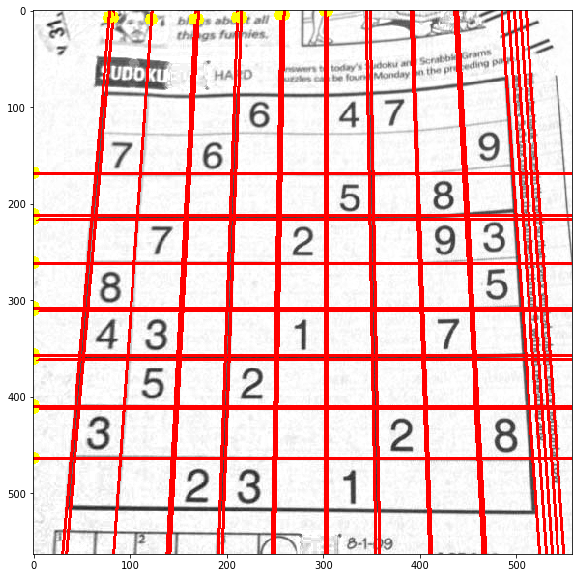

In [32]:
plt.figure(figsize=(10, 10))
img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

def line_midpoint(x1, y1, x2, y2):
    midpoint = (int((x1 + x2) / 2), int((y1 +y2) / 2))
    return midpoint

lines = cv2.HoughLines(edges, 1,np.pi/180,200)
# for line[0] in lines:
#     print(line[0])
for line in lines:
    for rho, theta in line:

        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        m = line_midpoint(x1, y1, x2, y2)
        print("{}, {}, {}".format((x1, y1), m, (x2, y2)))
        cv2.circle(img, (x1, y1), 3, (255, 0, 0), 5)
        cv2.circle(img, m, 3, (0, 255, 255), 5)
        cv2.circle(img, (x2, y2), 3, (0, 0, 255), 5)
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()